In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190226/'

In [3]:
dir_list = ['people30000']
seed_list = [str(123 + i) for i in range(1)]
csv_list = ['census', 'mobile']
times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [7]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                    encoding='Shift_JISx0213')
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            group_list = df.groupby(['time'], sort=False)
            for _times, _group in group_list:
                df = convert_area_to_contour(base.copy(), _group.copy())
                df = df.sort_index(ascending=False)
                csv_array[_dir][_seed][_csv][_times] = df

In [72]:
def create_contour(time_number, file_name=False):
    time = times_list[time_number]
    print(time)
    df = csv_array[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))
        
    print(df.sum().sum())

In [73]:
def create_contour_base(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [74]:
people = 'people30000'
seed = '123'
csv = 'mobile'

# コンター図

3600
1359.0


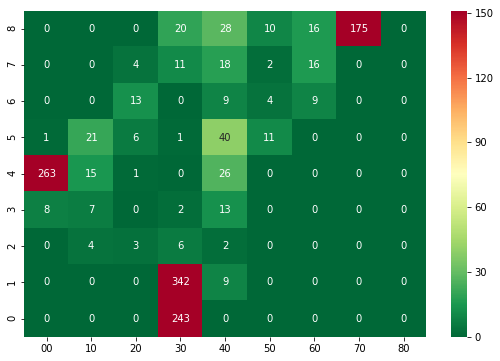

In [75]:
create_contour(0)

7200
2662.0


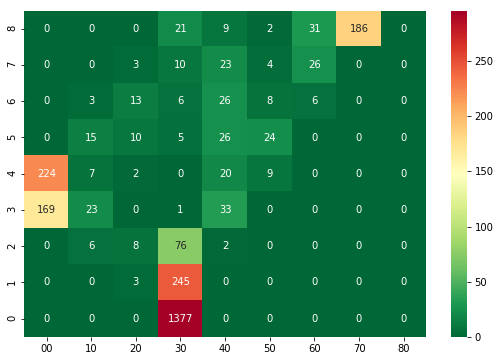

In [76]:
create_contour(1)

10800
3043.0


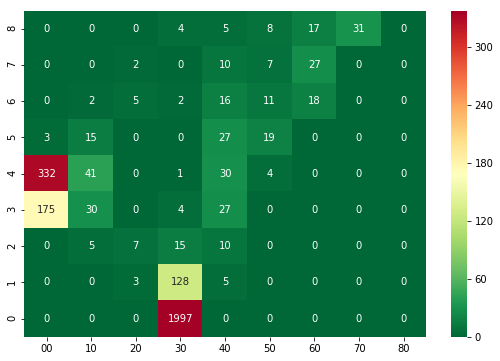

In [77]:
create_contour(2)

14400
3577.0


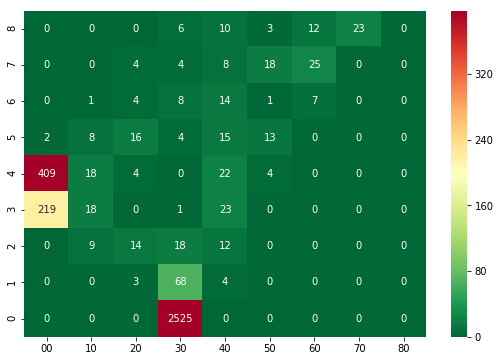

In [78]:
create_contour(3)

18000
3859.0


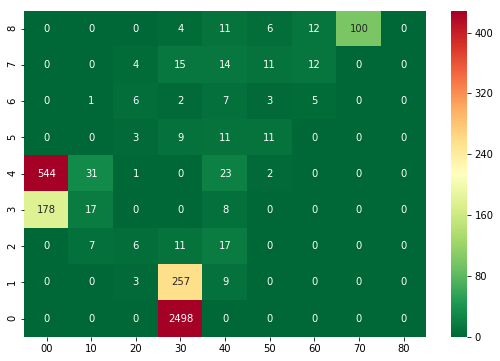

In [79]:
create_contour(4)

21600
399.0


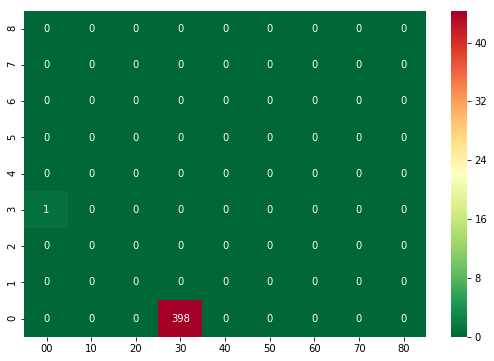

In [80]:
create_contour(5)

91691.0


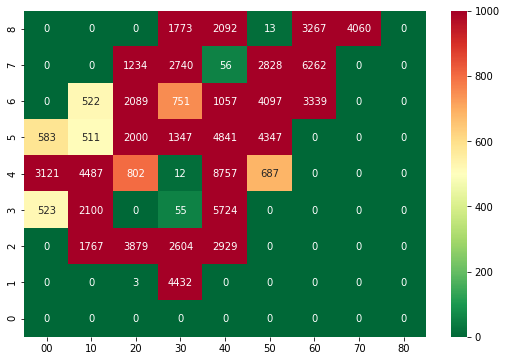

In [87]:
people = 'people30000'
seed = '123'
csv = 'census'
df_new = csv_array[people][seed][csv]['3600'].copy()
for _times in times_list:
    if _times != '3600':
        df_new += csv_array[people][seed][csv][_times].copy()

print(df_new.sum().sum())
plt.figure(figsize=(9,6))
sns.heatmap(df_new, annot=True, fmt='.0f', cmap='RdYlGn_r',
           vmax=1000, vmin=0)
    
# create_contour(df_new, '{0}seed{1}_{2}'.format(people, seed, csv))

In [18]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            sum_array = 0
            for _times in times_list:
                df = csv_array[_dir][_seed][_csv][_times].copy()
#                 print(df.sum().sum())
                sum_array += df.sum().sum()
            print(_dir, _seed, _csv)
            print(sum_array)

people30000 123 census
91691.0
people30000 123 mobile
14899.0


# 各エリアの人数 / 全体人数 = 割合

In [19]:
csv_array_percent = {}
for _dir in dir_list:
    csv_array_percent[_dir] = {}
    for _seed in seed_list:
        csv_array_percent[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_percent[_dir][_seed][_csv] = {}
            for _times in times_list:
                df = csv_array[_dir][_seed][_csv][_times].copy()
                df /= df.sum().sum()
                csv_array_percent[_dir][_seed][_csv][_times] = df

In [20]:
def create_contour_percent(time_number):
    time = times_list[time_number]
    print(time)
    df = csv_array_percent[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.3f', cmap='RdYlGn_r',
               vmax=0.02, vmin=0)

3600


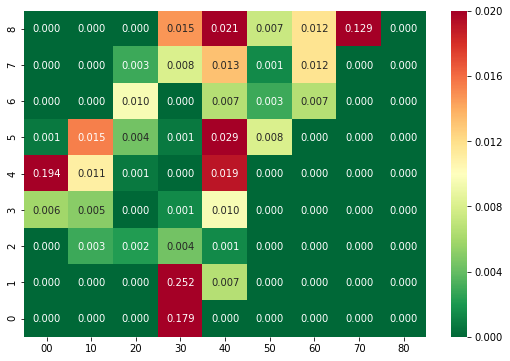

In [21]:
create_contour_percent(0)

7200


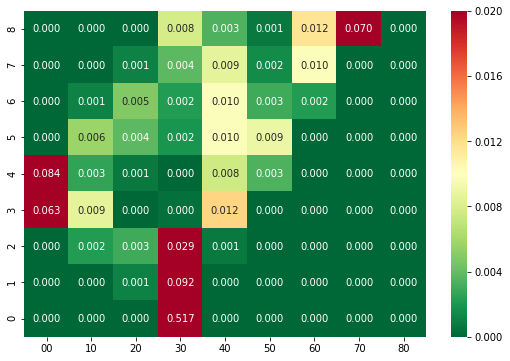

In [22]:
create_contour_percent(1)

10800


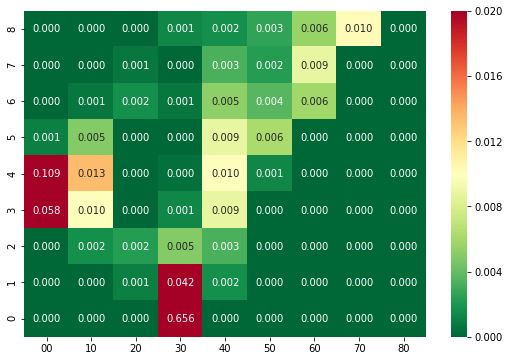

In [23]:
create_contour_percent(2)

14400


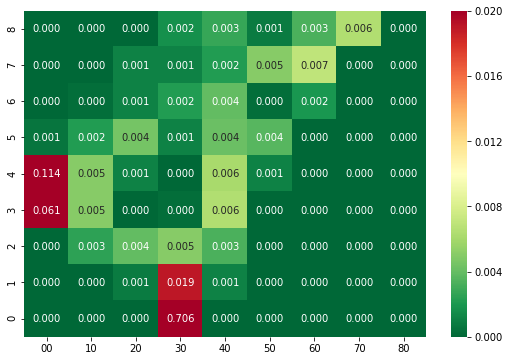

In [24]:
create_contour_percent(3)

18000


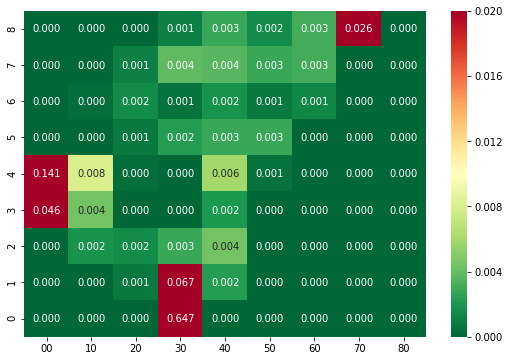

In [25]:
create_contour_percent(4)

21600


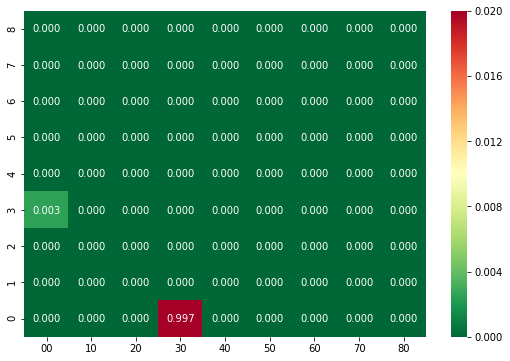

In [26]:
create_contour_percent(5)

# 1時間前とのpercentのdiff

In [27]:
csv_array_diff = {}
for _dir in dir_list:
    csv_array_diff[_dir] = {}
    for _seed in seed_list:
        csv_array_diff[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_diff[_dir][_seed][_csv] = {}
            for index, _times in enumerate(times_list):
                df = csv_array_percent[_dir][_seed][_csv][_times].copy()
                if _times != times_list[0]:
                    df_diff = csv_array_percent[_dir][_seed][_csv][times_list[index-1]]
                    df /= df_diff
                    df = df.replace(np.inf,np.nan).fillna(0)
                    csv_array_diff[_dir][_seed][_csv][_times] = df
#                 df.to_csv(root_dir + 'next_move_area_mobile_census/' + _dir + 'seed' + _seed + '_' + _csv + _times + '.csv')

In [28]:
def create_contour_diff(time_number):
    time = times_list[time_number]
    print(time)
    df = csv_array_diff[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
               vmax=2.5, vmin=0.5)

7200


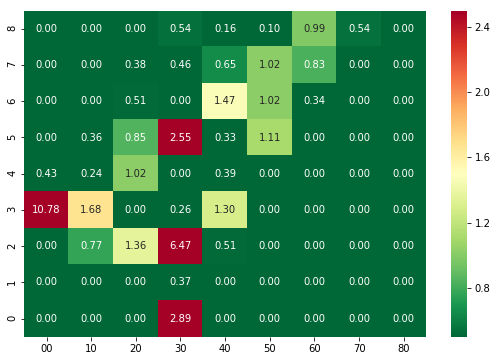

In [29]:
create_contour_diff(1)

10800


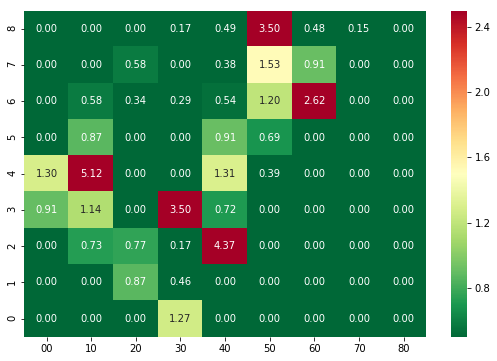

In [30]:
create_contour_diff(2)

14400


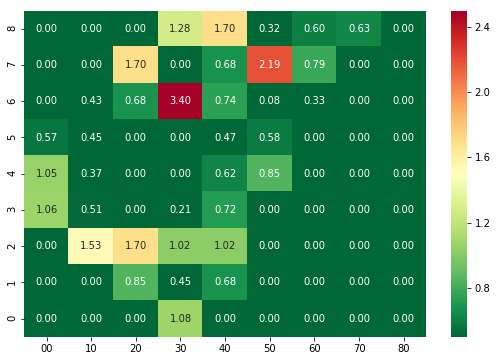

In [31]:
create_contour_diff(3)

18000


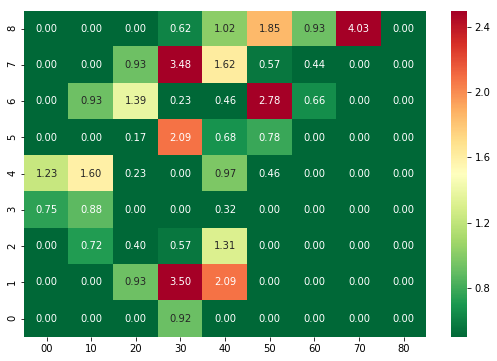

In [32]:
create_contour_diff(4)

21600


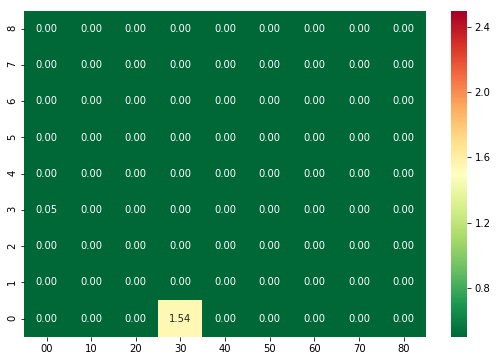

In [33]:
create_contour_diff(5)

# before_hour * diff

In [34]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    before_target = 'census'
    diff_target = 'mobile'
    before_hour = csv_array[people][seed][before_target][times_list[time_number-1]]
    diff = csv_array_diff[people][seed][diff_target][time]
    corrected = before_hour * diff
    
    plt.figure(figsize=(9,6))
    sns.heatmap(corrected, annot=True, fmt='.1f', cmap='RdYlGn_r',
               vmax=200, vmin=0)
    print('補正値合計:   ',corrected.sum().sum())
    print('mobile合計: ',csv_array[people][seed]['mobile'][time].sum().sum())
    print('census合計: ',csv_array[people][seed]['census'][time].sum().sum())

7200
補正値合計:    9955.144986418376
mobile合計:  2662.0
census合計:  15651.0


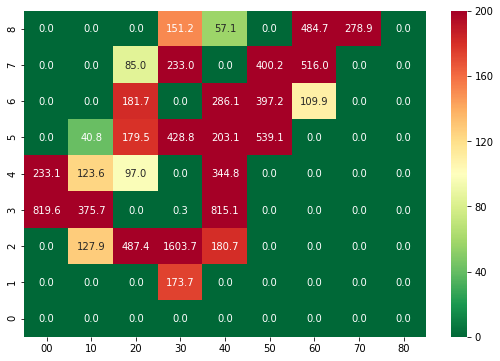

In [35]:
create_corrected(1)

10800
補正値合計:    18557.34235993804
mobile合計:  3043.0
census合計:  13943.0


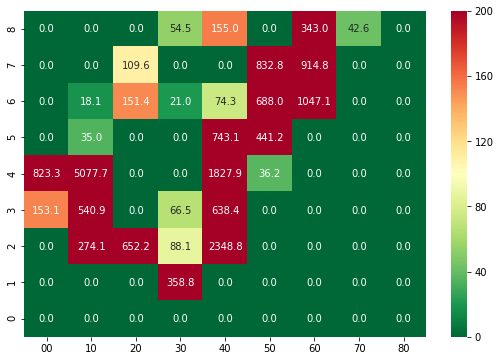

In [36]:
create_corrected(2)

14400
補正値合計:    10291.282260969485
mobile合計:  3577.0
census合計:  16656.0


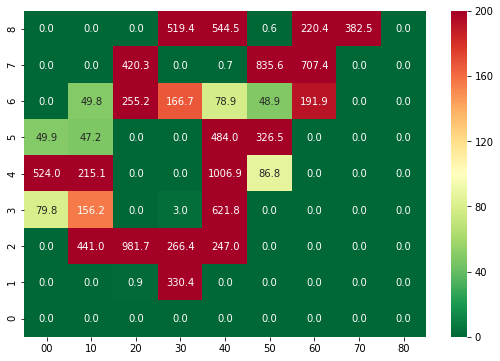

In [37]:
create_corrected(3)

18000
補正値合計:    20517.6724032735
mobile合計:  3859.0
census合計:  14841.0


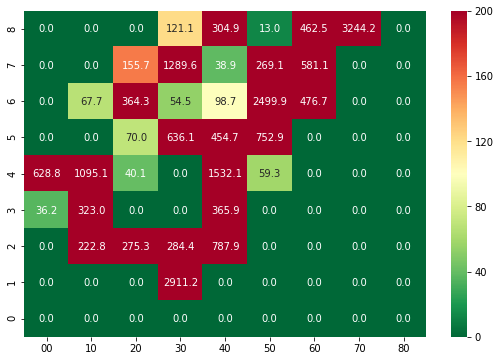

In [38]:
create_corrected(4)

21600
補正値合計:    3.7491340711328887
mobile合計:  399.0
census合計:  19433.0


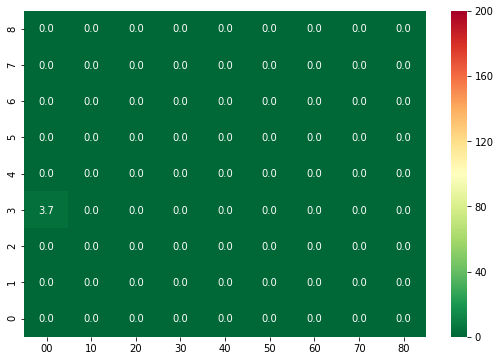

In [39]:
create_corrected(5)

# percent * normal

In [40]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    percent_target = 'mobile'
    normal_target = 'census'
    percent = csv_array_percent[people][seed][percent_target][time]
    normal = csv_array[people][seed][normal_target][time]
    corrected = percent * normal
    
    plt.figure(figsize=(9,6))
    sns.heatmap(corrected, annot=True, fmt='.1f', cmap='RdYlGn_r',
               vmax=200, vmin=0)
    print('補正値合計:   ',corrected.sum().sum())
    print(percent_target, '合計: ',csv_array[people][seed][percent_target][time].sum().sum())
    print(normal_target, '合計: ',csv_array[people][seed][normal_target][time].sum().sum())

In [41]:
# def create_corrected(time_number):
#     time = times_list[time_number]
#     print(time)
#     print(csv_array_percent[people][seed]['census'][time].sum().sum())
#     corrected = csv_array_percent[people][seed]['census'][time] * csv_array[people][seed]['mobile'][time]
# #     create_contour_base(corrected)
#     plt.figure(figsize=(9,6))
#     sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
#                vmax=df.sum().mean(), vmin=0)
#     print('補正値合計:   ',corrected.sum().sum())
#     print('ノーマル合計: ',csv_array[people][seed]['mobile'][time].sum().sum())

7200
補正値合計:    250.72464312546958
mobile 合計:  2662.0
census 合計:  15651.0


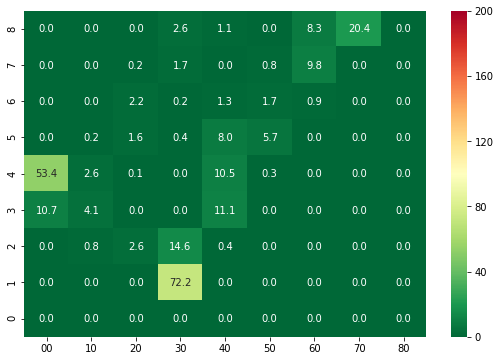

In [42]:
create_corrected(1)

10800
補正値合計:    166.44101215905357
mobile 合計:  3043.0
census 合計:  13943.0


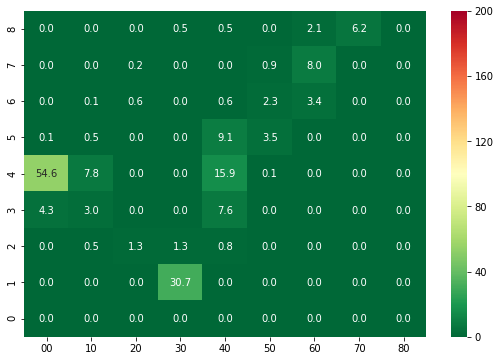

In [43]:
create_corrected(2)

14400
補正値合計:    139.9670114621191
mobile 合計:  3577.0
census 合計:  16656.0


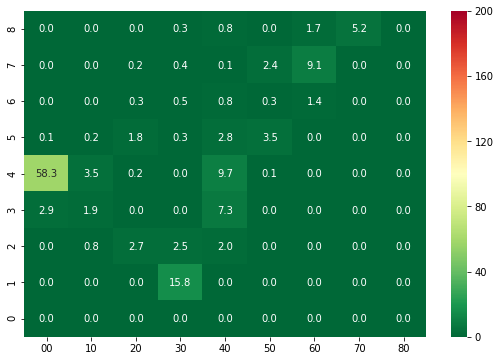

In [44]:
create_corrected(3)

18000
補正値合計:    170.10158072039388
mobile 合計:  3859.0
census 合計:  14841.0


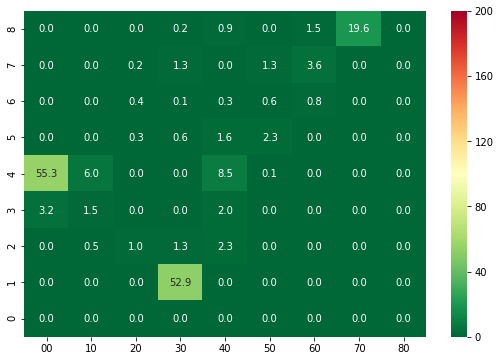

In [45]:
create_corrected(4)

21600
補正値合計:    0.21553884711779447
mobile 合計:  399.0
census 合計:  19433.0


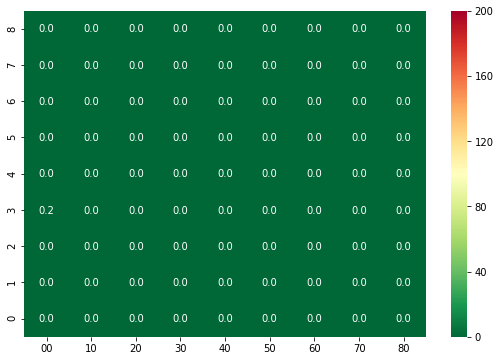

In [46]:
create_corrected(5)

# 1時間前とのdiff(normal)

In [47]:
csv_array_diff_normal = {}
for _dir in dir_list:
    csv_array_diff_normal[_dir] = {}
    for _seed in seed_list:
        csv_array_diff_normal[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_diff_normal[_dir][_seed][_csv] = {}
            for index, _times in enumerate(times_list):
                df = csv_array[_dir][_seed][_csv][_times].copy()
                if _times != times_list[0]:
                    df_diff = csv_array[_dir][_seed][_csv][times_list[index-1]]
                    df /= df_diff
#                     df = df.replace(np.inf,np.nan).fillna(0)
                    csv_array_diff_normal[_dir][_seed][_csv][_times] = df

In [48]:
def create_contour_diff_normal(time_number):
    time = times_list[time_number]
    df = csv_array_diff_normal[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
               vmax=2, vmin=1)

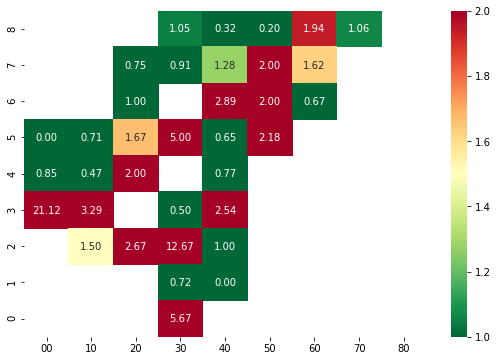

In [49]:
create_contour_diff_normal(1)

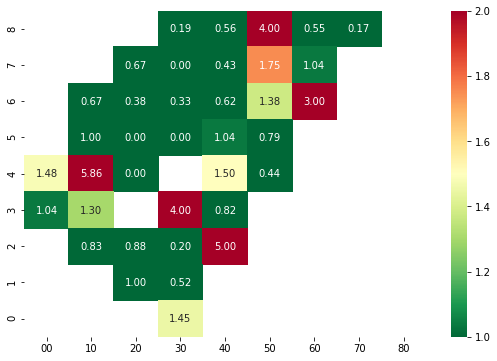

In [50]:
create_contour_diff_normal(2)

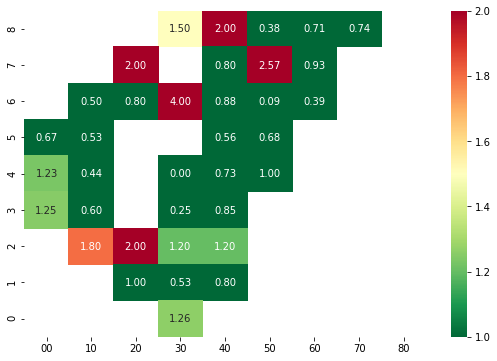

In [51]:
create_contour_diff_normal(3)

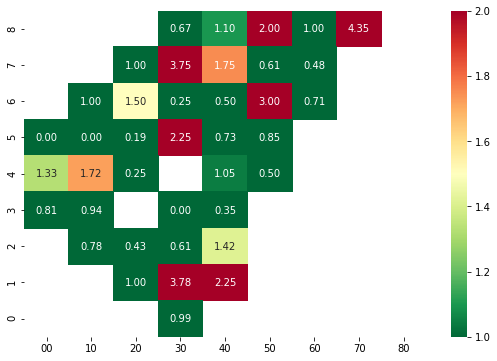

In [52]:
create_contour_diff_normal(4)

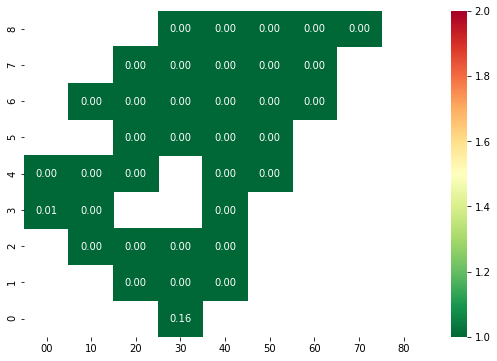

In [53]:
create_contour_diff_normal(5)